In [1]:
import sys
sys.path.append("/Users/wenfengwang/work/go_stuff/mistsys/mist-rrm-exp/")
sys.path
from datetime import datetime, timedelta
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
import csv
import itertools


filename = "../data/cisco-1.txt"
with open(filename, "rb") as f:
    stripped = (line.lstrip("*").split(": ") for line in f)
    lines = (line[:-1] + line[-1].split(" ", 1) for line in stripped if line)

    with open('extracted.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('name', 'time', 'tag', 'tag2','details') )
        writer.writerows(lines)

In [3]:

import pandas as pd
data = pd.read_csv('extracted.csv')
def addYear(d, year):
    d = d.split()
    if d[2] != year:
        d.insert(2, year)
    d=" ".join(d)
    d = datetime.strptime(d, '%b %d %Y %H:%M:%S.%f')
    return d

data['time'] = data['time'].apply(lambda x: addYear(x, "2015"))
data[:10]

,name,time,tag,tag2,details
0,spamApTask1,2015-08-13 18:32:26.394000,%LWAPP-3-REPLAY_ERR,spam_lrad.c:40104,The system has received replay error on slot 0...
1,Dot1x_NW_MsgTask_2,2015-08-13 18:03:27.842000,%DOT1X-3-INVALID_REPLAY_CTR,1x_eapkey.c:446,Invalid replay counter from client 9c:04:eb:39...
2,Dot1x_NW_MsgTask_4,2015-08-13 17:26:46.904000,%DOT1X-3-INVALID_REPLAY_CTR,1x_eapkey.c:446,Invalid replay counter from client e0:b5:2d:26...
3,Dot1x_NW_MsgTask_4,2015-08-13 17:26:46.903000,%DOT1X-3-INVALID_REPLAY_CTR,1x_eapkey.c:446,Invalid replay counter from client e0:b5:2d:26...
4,Dot1x_NW_MsgTask_7,2015-08-13 17:26:45.542000,%DOT1X-3-INVALID_REPLAY_CTR,1x_eapkey.c:446,Invalid replay counter from client b8:e8:56:ee...
5,spamApTask1,2015-08-13 17:18:26.389000,%LWAPP-3-REPLAY_ERR,spam_lrad.c:40104,The system has received replay error on slot 0...
6,Dot1x_NW_MsgTask_5,2015-08-13 17:08:28.594000,%DOT1X-3-INVALID_REPLAY_CTR,1x_eapkey.c:446,Invalid replay counter from client 18:f6:43:46...
7,Dot1x_NW_MsgTask_4,2015-08-13 17:07:00.119000,%DOT1X-3-ABORT_AUTH,1x_bauth_sm.c:449,Authentication Aborted for client e4:98:d6:04...
8,spamApTask1,2015-08-13 16:52:15.115000,%LWAPP-3-REPLAY_ERR,spam_lrad.c:40104,The system has received replay error on slot 1...
9,spamApTask6,2015-08-13 16:48:26.084000,%LWAPP-3-REPLAY_ERR,spam_lrad.c:40104,The system has received replay error on slot 0...


In [4]:
#pd.DataFrame.hist(data, "time")

def plotName(data, name, filename=""):
    res = {}
    for x in data[name]:
        res[x] = ( res.get(x) or 0 ) + 1

    #plt.hist(res.values())
    fig = plt.figure(figsize=(22.22,10),dpi=300)
    plt.bar(range(len(res)), res.values(), align='center')
    plt.ylabel('numbers', fontsize=18)
    plt.xticks(range(len(res)), res.keys())
    plt.xticks(rotation=70)
    plt.tick_params(axis='both', which='major', labelsize=20)

    if filename:
        fig.savefig(filename, dpi=fig.dpi)
    plt.show()
    

In [5]:
for x in data["details"]:
    print x

The system has received replay error on slot 0, WLAN ID 1, count 1 from AP 74:a0:2f:21:e3:40

Invalid replay counter from client 9c:04:eb:39:8d:d2 - got 00 00 00 00 00 00 00 03, expected 00 00 00 00 00 00 00 04

Invalid replay counter from client e0:b5:2d:26:82:64 - got 00 00 00 00 00 00 00 03, expected 00 00 00 00 00 00 00 04

Invalid replay counter from client e0:b5:2d:26:82:64 - got 00 00 00 00 00 00 00 02, expected 00 00 00 00 00 00 00 04

Invalid replay counter from client b8:e8:56:ee:55:27 - got 00 00 00 00 00 00 00 02, expected 00 00 00 00 00 00 00 03

The system has received replay error on slot 0, WLAN ID 4, count 1 from AP 74:a0:2f:21:e3:40

Invalid replay counter from client 18:f6:43:46:d7:6d - got 00 00 00 00 00 00 00 03, expected 00 00 00 00 00 00 00 04

 Authentication Aborted for client e4:98:d6:04:06:5c

The system has received replay error on slot 1, WLAN ID 4, count 1 from AP 74:a0:2f:21:e3:40

The system has received replay error on slot 0, WLAN ID 4, count 25 from A

In [6]:
#data["time"]
data[["name","time","tag"]]

,name,time,tag
0,spamApTask1,2015-08-13 18:32:26.394000,%LWAPP-3-REPLAY_ERR
1,Dot1x_NW_MsgTask_2,2015-08-13 18:03:27.842000,%DOT1X-3-INVALID_REPLAY_CTR
2,Dot1x_NW_MsgTask_4,2015-08-13 17:26:46.904000,%DOT1X-3-INVALID_REPLAY_CTR
3,Dot1x_NW_MsgTask_4,2015-08-13 17:26:46.903000,%DOT1X-3-INVALID_REPLAY_CTR
4,Dot1x_NW_MsgTask_7,2015-08-13 17:26:45.542000,%DOT1X-3-INVALID_REPLAY_CTR
5,spamApTask1,2015-08-13 17:18:26.389000,%LWAPP-3-REPLAY_ERR
6,Dot1x_NW_MsgTask_5,2015-08-13 17:08:28.594000,%DOT1X-3-INVALID_REPLAY_CTR
7,Dot1x_NW_MsgTask_4,2015-08-13 17:07:00.119000,%DOT1X-3-ABORT_AUTH
8,spamApTask1,2015-08-13 16:52:15.115000,%LWAPP-3-REPLAY_ERR
9,spamApTask6,2015-08-13 16:48:26.084000,%LWAPP-3-REPLAY_ERR


In [7]:
#print "lines ", len(data["details"]), " unique problem ", len(set(data["details"]))
import pprint
for col in data.columns:
    print "\n",col, len(set(data[col]))
    if col not in ["time", "details"]:
        pprint.pprint( set(data[col]) )
#for col in ['name',"tag","details"]
#set(data["name"])


name 11
set(['Dot1x_NW_MsgTask_2',
     'Dot1x_NW_MsgTask_3',
     'Dot1x_NW_MsgTask_4',
     'Dot1x_NW_MsgTask_5',
     'Dot1x_NW_MsgTask_6',
     'Dot1x_NW_MsgTask_7',
     'dot1xMsgTask',
     'emWeb',
     'spamApTask1',
     'spamApTask5',
     'spamApTask6'])

time 459

tag 7
set(['%AAA-3-ACCTREQ_SEND_FAILED',
     '%DOT1X-3-AAA_AUTH_SEND_FAIL',
     '%DOT1X-3-ABORT_AUTH',
     '%DOT1X-3-INVALID_REPLAY_CTR',
     '%DOT1X-3-WPA_SEND_STATE_ERR',
     '%EMWEB-3-LOGIN_FAILED',
     '%LWAPP-3-REPLAY_ERR'])

tag2 7
set(['1x_aaa.c:846',
     '1x_bauth_sm.c:449',
     '1x_eapkey.c:446',
     '1x_kxsm.c:1405',
     'aaa.c:3716',
     'ews_auth.c:2140',
     'spam_lrad.c:40104'])

details 36


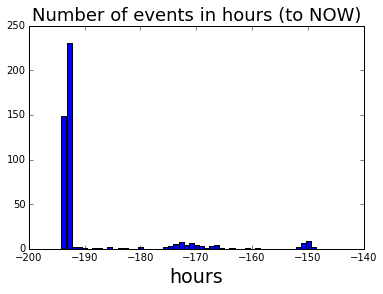

In [8]:


dx =(data["time"] - datetime.now())/timedelta(hours=1)
h=plt.hist(dx, bins=50)
plt.xlabel("hours", fontsize=19)
plt.title("Number of events in hours (to NOW)", fontsize=18)

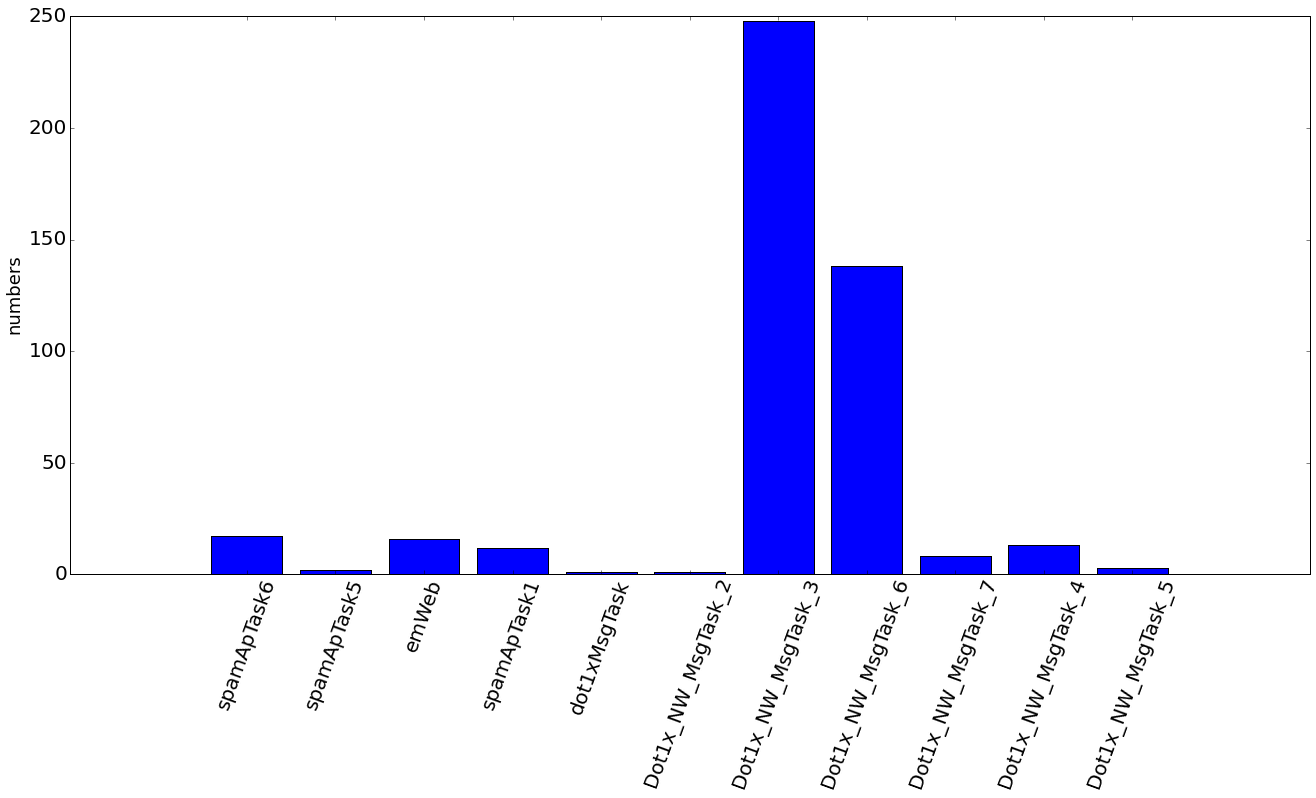

In [9]:
plotName(data, "name")

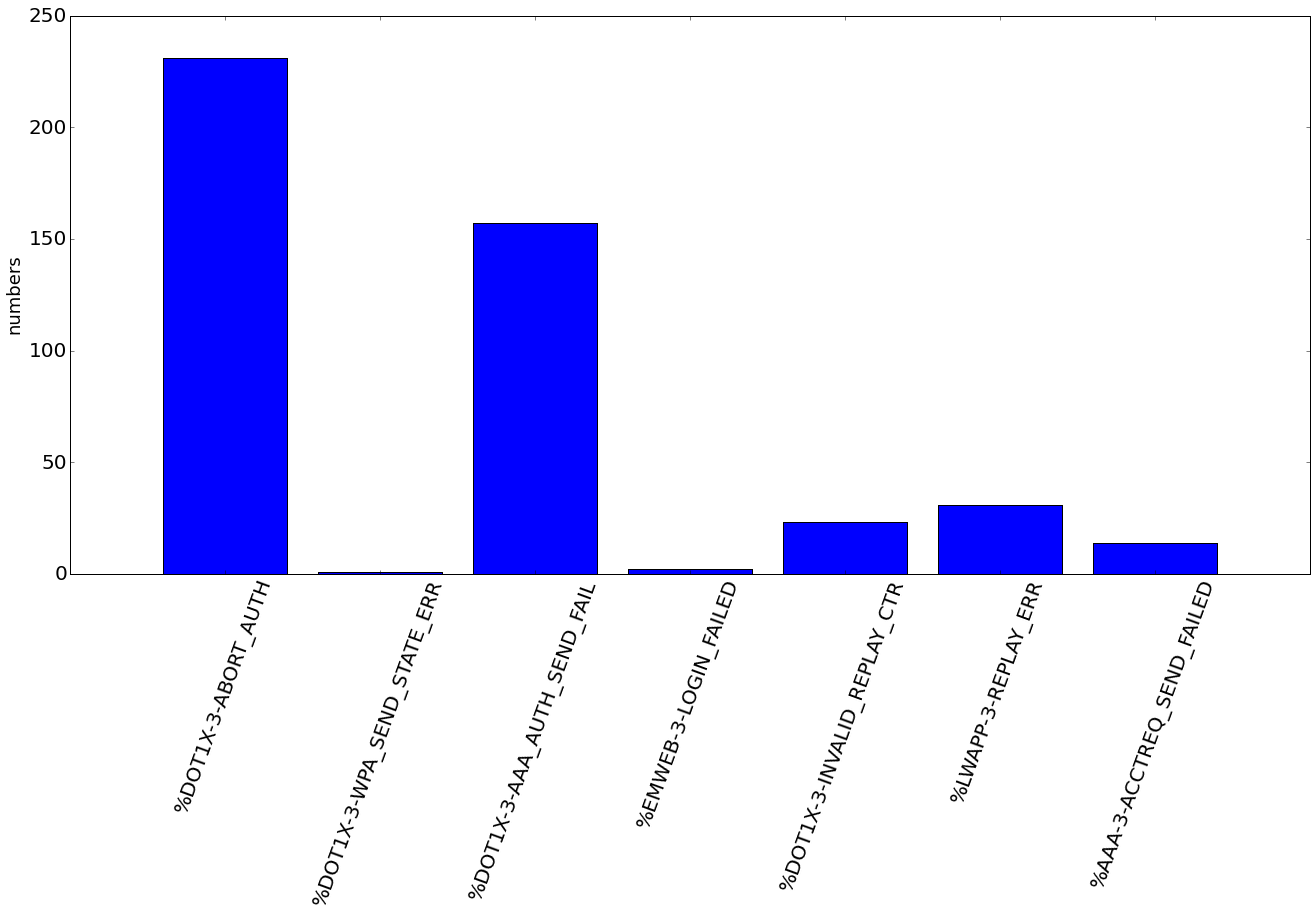

In [10]:
plotName(data, "tag")


# RADIUS : Remote Authentication Dial-in User Service 
Authentication,  Authorization and Accounting (AAA)

In [11]:

#d
#datetime.now()
#datetime.strptime("Aug 13 18:03", '%b %d %H:%M')
#dir(d), d.year = 2015

In [12]:
import re

def findMACs(s):
    macPatt= re.compile(ur'(?:[0-9a-fA-F]:?){12}')
    return re.findall(macPatt, s)


message1 = "Coverage hole pre alarm for client[2] 9c:f3:87:51:f6:4d on 802.11b/g interface of AP 74:a0:2f:21:cd:30 (Mist_Reception). Hist: 0 0 0 0 0 0 2 9 24 49 9 3 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0"

macs = findMACs(message1)
print(macs)



['9c:f3:87:51:f6:4d', '74:a0:2f:21:cd:30']


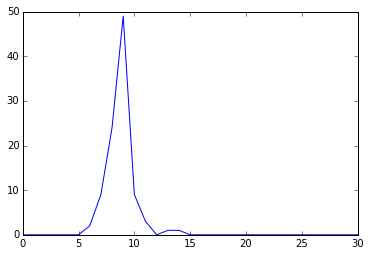

In [13]:


message1 = "Coverage hole pre alarm for client[2] 9c:f3:87:51:f6:4d on 802.11b/g interface of AP 74:a0:2f:21:cd:30 (Mist_Reception). Hist: 0 0 0 0 0 0 2 9 24 49 9 3 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0"

hist = "0 0 0 0 0 0 2 9 24 49 9 3 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0"
#hist = hist.split()
hist = [int(x) for x in hist.split()]
plt.plot(hist)


# Trap Logs

In [14]:
trapFile = "../data/cisco-trap.txt"
with open(trapFile, "rb") as f:
    lines = f.readlines()[5:]
    #lines = (line.split("\t") for line in lines)
    #for line in lines:        print line.split("\t")
    with open('extracted_trap.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('SystemTime', 'Trap') )
        for line in lines:
            writer.writerow( line.split("\t")[1:])
    #    writer.writerows(lines)
#lines[:3]


In [15]:
import pandas as pd
dataTrap = pd.read_csv('extracted_trap.csv')

dataTrap['SystemTime'] = dataTrap['SystemTime'].apply(lambda x: datetime.strptime(x, "%a %b %d %H:%M:%S %Y"))
dataTrap["MACs"]  = [ findMACs(x) for x in dataTrap["Trap"]]


dataTrap[:10]


,SystemTime,Trap,MACs
0,2015-08-14 18:03:13,Load Profile Updated to Pass for Base Radio MA...,[74:a0:2f:21:e3:40]
1,2015-08-14 18:02:13,Load Client Profile Failed for Base Radio MAC:...,[74:a0:2f:21:e3:40]
2,2015-08-14 17:45:27,Noise Profile Updated to Pass for Base Radio M...,[74:a0:2f:21:cd:30]
3,2015-08-14 17:45:27,Interference Profile Updated to Pass for Base ...,[74:a0:2f:21:cd:30]
4,2015-08-14 17:43:16,Load Client Profile Failed for Base Radio MAC:...,[74:a0:2f:21:e3:40]
5,2015-08-14 17:42:16,Load Profile Updated to Pass for Base Radio MA...,[74:a0:2f:21:cd:30]
6,2015-08-14 17:40:16,Load Profile Updated to Pass for Base Radio MA...,[74:a0:2f:21:e3:40]
7,2015-08-14 17:35:16,Load Client Profile Failed for Base Radio MAC:...,[74:a0:2f:21:cd:30]
8,2015-08-14 17:29:16,Load Profile Updated to Pass for Base Radio MA...,[74:a0:2f:21:cd:30]
9,2015-08-14 17:27:16,Load Client Profile Failed for Base Radio MAC:...,[74:a0:2f:21:cd:30]


In [16]:
types = ["Coverage hole",
         "Load Profile",
         "Noise Profile Updated",
         "Interference Profile Updated",
         "Interference Profile Failed",
         "Load Client Profile Failed",
         "Noise Profile Failed",
         "IDS Signature attack detected",
         "IDS Signature attack cleared",
         "Decrypt errors occurred for client",
         "AAA Authentication Failure",
         "RADIUS",
         "Configuration"]
res =[]
for _,x in dataTrap.iterrows():    
    tmp = "other"
    for xtype in types:
        if x["Trap"].find(xtype)==0:
            tmp = xtype
            continue
            break
    res.append(tmp)
dataTrap["type"] = res
    
#dataTrap["type"]
#len(data["Trap"]), len(set(data["Trap"]))
#for x in data:    #print x


In [17]:
#df.loc[df['column_name'].isin(some_values)]
dataTrap[dataTrap["type"]=="other"]


,SystemTime,Trap,MACs,type
891,2015-08-11 23:50:51,Coverage Hole Detected for AP Mist_Reception w...,[74:a0:2f:21:cd:30],other


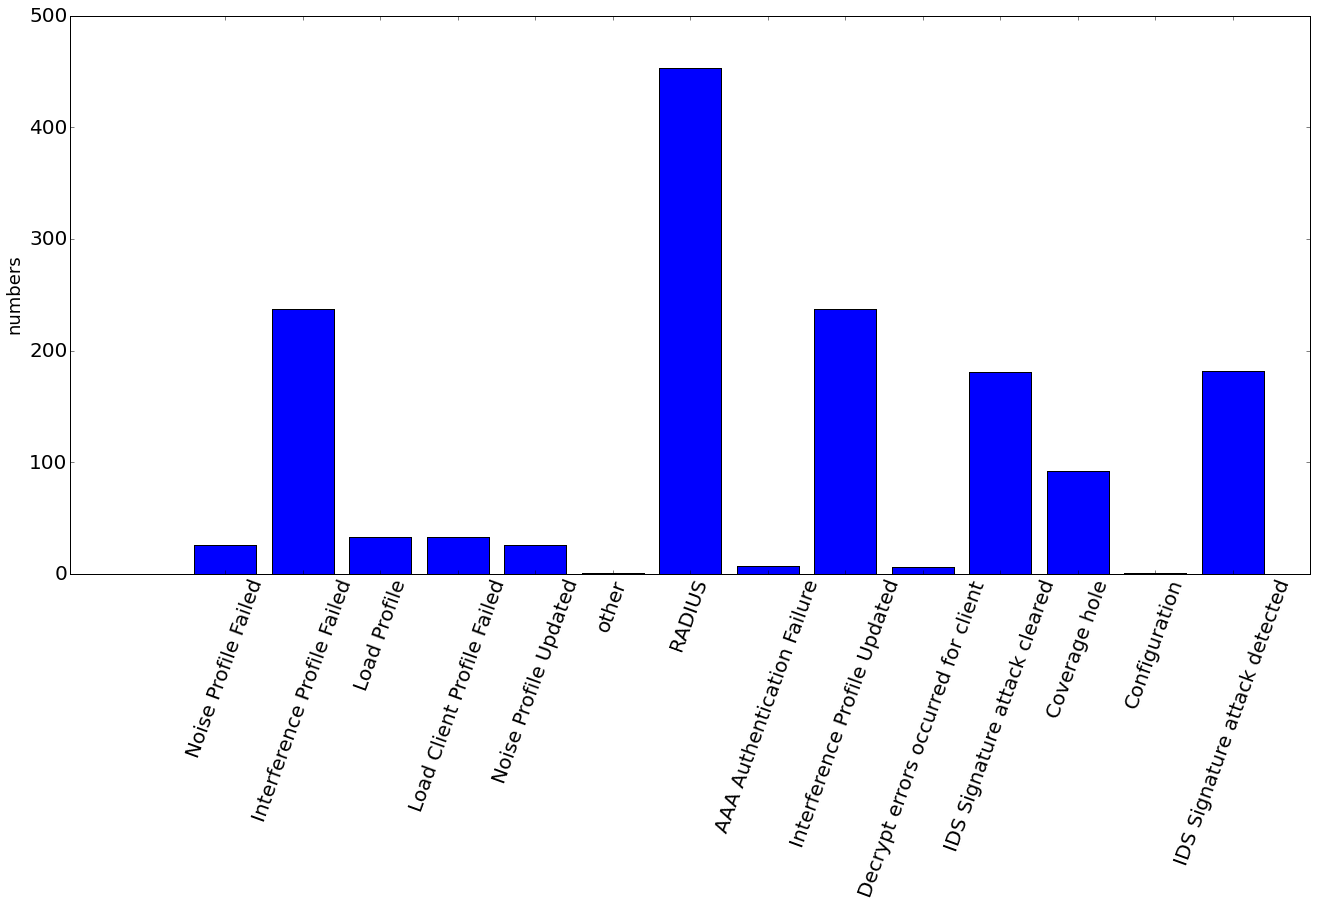

In [18]:
fig = plotName(dataTrap, "type", "tmp.png")
#fig.savefig('temp.png', dpi=fig.dpi)

In [19]:
macs = dataTrap[dataTrap["type"]=="IDS Signature attack detected"]["MACs"]


In [20]:
set([m[0] for m in macs])

{'04:A1:51:2C:DC:63',
 '8A:15:04:A3:B7:D0',
 '8A:15:04:F3:81:30',
 '8A:15:14:A3:B7:D0',
 '8A:15:14:F3:81:30',
 'AC:86:74:12:08:1F',
 'E8:FC:AF:DB:AC:4F'}

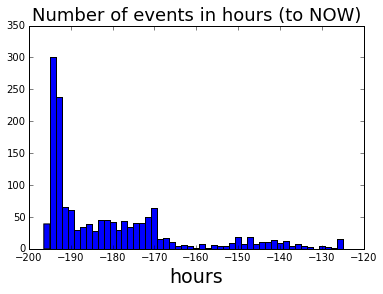

In [21]:
from datetime import datetime, timedelta

dx = (dataTrap["SystemTime"] - datetime.now())/timedelta(hours=1)
#dx = (dataTrap[dataTrap["type"]=="IDS Signature attack detected"]["SystemTime"]- datetime.now())/timedelta(hours=1)
#print dx
h=plt.hist(dx, bins=50)
plt.xlabel("hours", fontsize=19)
plt.title("Number of events in hours (to NOW)", fontsize=18)


In [29]:
for _,mes in data[:3].iterrows():
    for _,trap in dataTrap[:2].iterrows():
        print mes["time"], trap["SystemTime"], (mes["time"]- trap["SystemTime"])/timedelta(hours=1)
        

2015-08-13 18:32:26.394000 2015-08-14 18:03:13 -23.5129461111
2015-08-13 18:32:26.394000 2015-08-14 18:02:13 -23.4962794444
2015-08-13 18:03:27.842000 2015-08-14 18:03:13 -23.9958772222
2015-08-13 18:03:27.842000 2015-08-14 18:02:13 -23.9792105556
2015-08-13 17:26:46.904000 2015-08-14 18:03:13 -24.6072488889
2015-08-13 17:26:46.904000 2015-08-14 18:02:13 -24.5905822222


In [31]:
test = data[:2]
test[""]


,name,time,tag,tag2,details
0,spamApTask1,2015-08-13 18:32:26.394000,%LWAPP-3-REPLAY_ERR,spam_lrad.c:40104,The system has received replay error on slot 0...
